In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import numpy as np
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt

sns.set()

# Load Data

In [ ]:
eq_df = pd.read_csv("/content/gdrive/MyDrive/earthquake_forecasting/output_file.csv")
eq_df.head()

Date & Time  Latitude  Longitude  Depth  Magnitude     Lands  \
0  2023-11-21 17:43:13    31.592   -104.549    3.0        2.7   WESTERN   
1  2023-11-21 17:31:49   -24.200    -67.580  198.0        4.0    SALTA,   
2  2023-11-21 17:27:04    31.647   -104.017    5.0        2.9   WESTERN   
3  2023-11-21 17:01:48    46.345     13.601    0.0        0.8  SLOVENIA   
4  2023-11-21 16:56:35    -4.320    130.810   10.0        3.3     BANDA   

     Country  
0      TEXAS  
1  ARGENTINA  
2      TEXAS  
3   SLOVENIA  
4        SEA

# Analysing Data



1.   Describing Data
2.   Converting Date Time Column to Datetime type
3.   Setting Date Time column as index
4.   Sorting the Dataframe corresponding to Index
5.   Finding Correlation Between Numerical Columns







In [ ]:
df = eq_df.copy()
df.describe()

Latitude     Longitude         Depth     Magnitude
count  53539.000000  53539.000000  53539.000000  53539.000000
mean      21.120630    -15.421862     35.799959      2.962569
std       25.645429     93.129891     67.580186      0.893910
min      -65.899000   -179.992000     -4.000000     -0.700000
25%        8.485000    -94.570000      6.000000      2.300000
50%       29.320000     -8.373000     10.000000      2.900000
75%       38.470000     37.460000     32.000000      3.500000
max       85.330000    180.000000    750.000000      7.700000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date & Time  53539 non-null  object 
 1   Latitude     53539 non-null  float64
 2   Longitude    53539 non-null  float64
 3   Depth        53539 non-null  float64
 4   Magnitude    53539 non-null  float64
 5   Lands        53539 non-null  object 
 6   Country      53539 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.9+ MB


In [ ]:
df["Date & Time"] = pd.to_datetime(df["Date & Time"], dayfirst=True)

In [ ]:
df["Date & Time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 53539 entries, 0 to 53538
Series name: Date & Time
Non-Null Count  Dtype         
--------------  -----         
53539 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 418.4 KB


In [ ]:
df.head()

Date & Time  Latitude  Longitude  Depth  Magnitude     Lands  \
0 2023-11-21 17:43:13    31.592   -104.549    3.0        2.7   WESTERN   
1 2023-11-21 17:31:49   -24.200    -67.580  198.0        4.0    SALTA,   
2 2023-11-21 17:27:04    31.647   -104.017    5.0        2.9   WESTERN   
3 2023-11-21 17:01:48    46.345     13.601    0.0        0.8  SLOVENIA   
4 2023-11-21 16:56:35    -4.320    130.810   10.0        3.3     BANDA   

     Country  
0      TEXAS  
1  ARGENTINA  
2      TEXAS  
3   SLOVENIA  
4        SEA

In [ ]:
df["Date & Time"].describe()

<ipython-input-9-8f24edb0d8fc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Date & Time"].describe()


count                   53539
unique                  53539
top       2023-11-21 17:43:13
freq                        1
first     2023-05-14 09:27:39
last      2023-11-21 17:43:13
Name: Date & Time, dtype: object

In [ ]:
df.set_index('Date & Time', inplace=True)
df.head()

Latitude  Longitude  Depth  Magnitude     Lands  \
Date & Time                                                            
2023-11-21 17:43:13    31.592   -104.549    3.0        2.7   WESTERN   
2023-11-21 17:31:49   -24.200    -67.580  198.0        4.0    SALTA,   
2023-11-21 17:27:04    31.647   -104.017    5.0        2.9   WESTERN   
2023-11-21 17:01:48    46.345     13.601    0.0        0.8  SLOVENIA   
2023-11-21 16:56:35    -4.320    130.810   10.0        3.3     BANDA   

                       Country  
Date & Time                     
2023-11-21 17:43:13      TEXAS  
2023-11-21 17:31:49  ARGENTINA  
2023-11-21 17:27:04      TEXAS  
2023-11-21 17:01:48   SLOVENIA  
2023-11-21 16:56:35        SEA

In [ ]:
df.select_dtypes(include=[np.number]).corr()


Latitude  Longitude     Depth  Magnitude
Latitude   1.000000  -0.136270 -0.393834  -0.428230
Longitude -0.136270   1.000000  0.008043   0.130760
Depth     -0.393834   0.008043  1.000000   0.299489
Magnitude -0.428230   0.130760  0.299489   1.000000

Latitude and Longitude: A weak negative correlation (-0.136), which means there is a slight tendency for one to decrease as the other increases (and vice versa).
Latitude and Depth: A moderate negative correlation (-0.394), suggesting that there is a somewhat stronger tendency for one to decrease as the other increases (and vice versa).
Latitude and Magnitude: A moderate negative correlation (-0.428), indicating a moderate tendency for one to decrease as the other increases (and vice versa).
Longitude and Depth: A very weak positive correlation (0.008), suggesting a weak tendency for one to increase as the other increases (and vice versa).
Longitude and Magnitude: A weak positive correlation (0.131), indicating a slight tendency for one to increase as the other increases (and vice versa).
Depth and Magnitude: A moderate positive correlation (0.299), suggesting a moderate tendency for one to increase as the other increases (and vice versa).

In [ ]:
df_sort = df.sort_index()


In [ ]:
dfcopy = df_sort.copy()

# Exploratory Data Analysis

### Land and Country Analysis:

1.   Which lands or countries experience the most earthquakes?
2.   Are there specific regions that are more prone to seismic events?




In [ ]:
dfcopy.head()

Latitude  Longitude  Depth  Magnitude  \
Date & Time                                                  
2023-05-14 09:27:39    -23.97     -67.46  240.0        3.7   
2023-05-14 09:28:10     15.89     -93.52  106.0        3.9   
2023-05-14 09:48:51     19.40    -155.24    2.0        2.2   
2023-05-14 09:49:42     11.52     141.62   10.0        5.1   
2023-05-14 09:50:19     18.08    -103.27    7.0        3.5   

                                    Lands     Country  
Date & Time                                            
2023-05-14 09:27:39          ANTOFAGASTA,       CHILE  
2023-05-14 09:28:10              CHIAPAS,      MEXICO  
2023-05-14 09:48:51   ISLAND, OF, HAWAII,      HAWAII  
2023-05-14 09:49:42       STATE, OF, YAP,  MICRONESIA  
2023-05-14 09:50:19  OFFSHORE, MICHOACAN,      MEXICO

#### Which lands or countries experience the most earthquakes?

In [ ]:
dfcopy['Lands'] + ' ' + dfcopy['Country']

# Count the occurrences of each location
location_counts = pd.Series(dfcopy['Lands'] + ' ' + dfcopy['Country']).value_counts()

# Top N locations with the most earthquakes
top_n = 10
top_locations = location_counts.head(top_n)

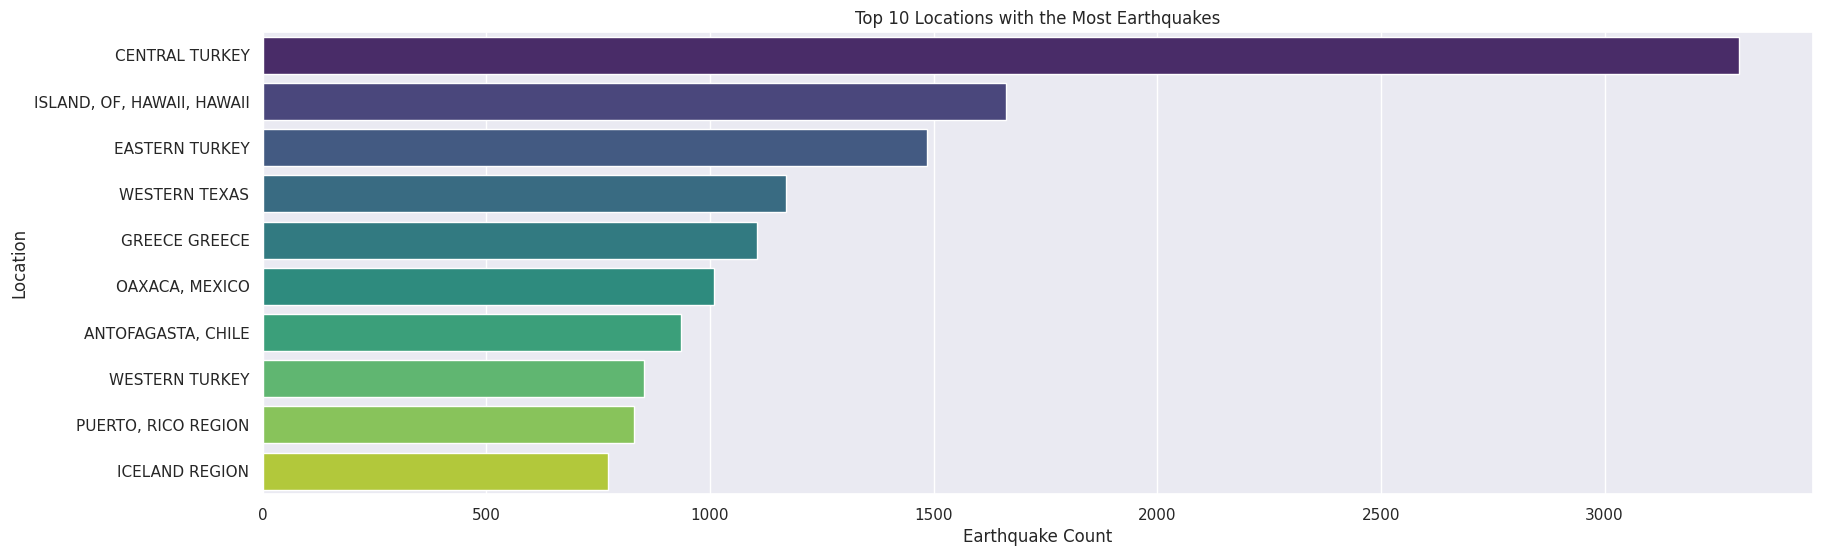

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x=top_locations, y=top_locations.index, palette='viridis')
plt.title(f'Top {top_n} Locations with the Most Earthquakes')
plt.xlabel('Earthquake Count')
plt.ylabel('Location')
plt.show()

#### Are there specific regions that are more prone to seismic events?


['TURKEY']


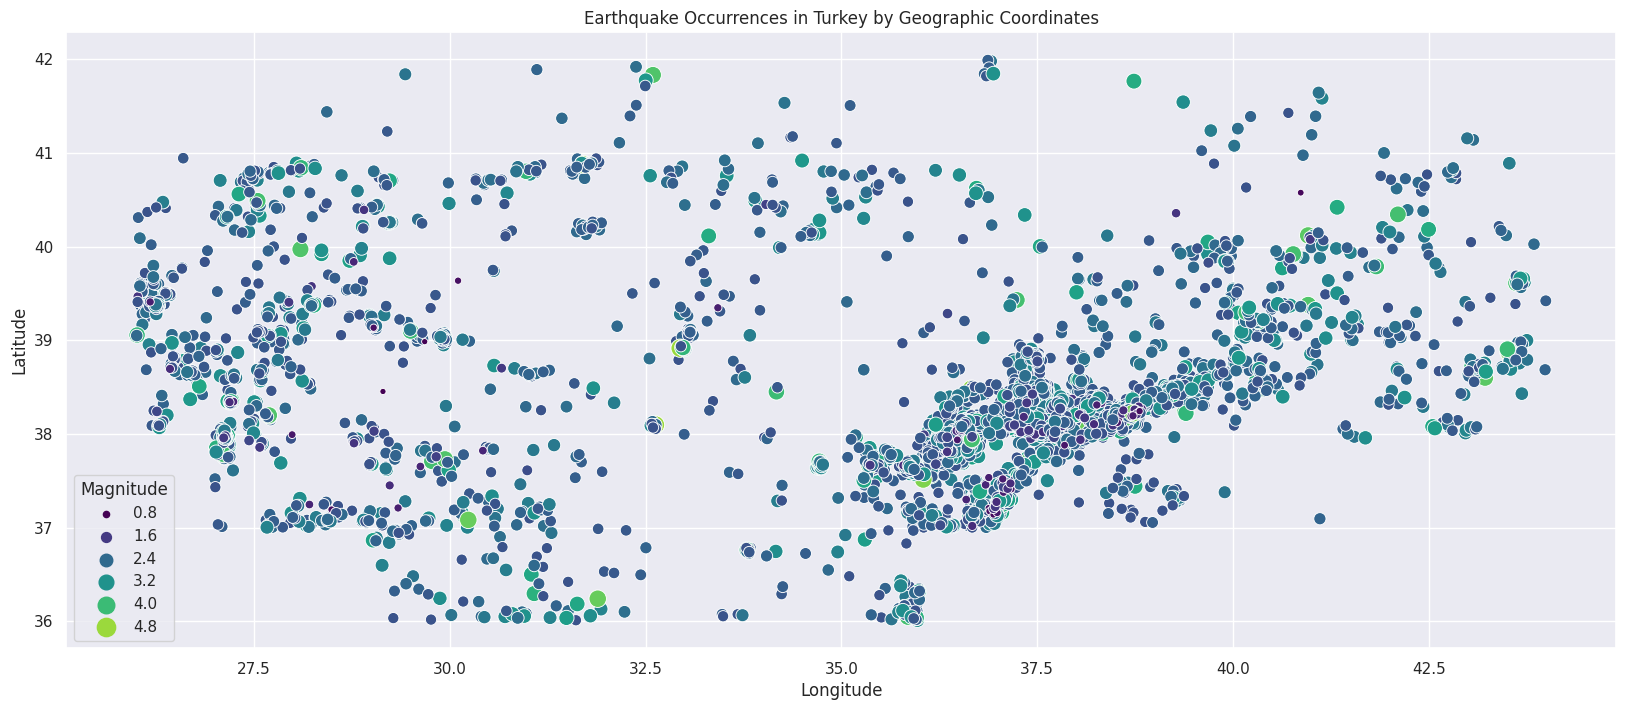

In [ ]:
dfcopy['Country'] = dfcopy['Country'].str.strip()  # Remove leading/trailing whitespaces
turkey_data = dfcopy[dfcopy['Country'].str.lower() == 'turkey']  # Case-insensitive match

# Check unique values in the 'Country' column
print(turkey_data['Country'].unique())

plt.figure(figsize=(20, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=turkey_data, hue='Magnitude', palette='viridis', size='Magnitude', sizes=(20, 200))
plt.title('Earthquake Occurrences in Turkey by Geographic Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.show()

### Temporal Patterns:


1.   How does the frequency of earthquakes vary over time?
2.   Are there specific days, months, or seasons with higher seismic activity?




#### How does the frequency of earthquakes vary over time?

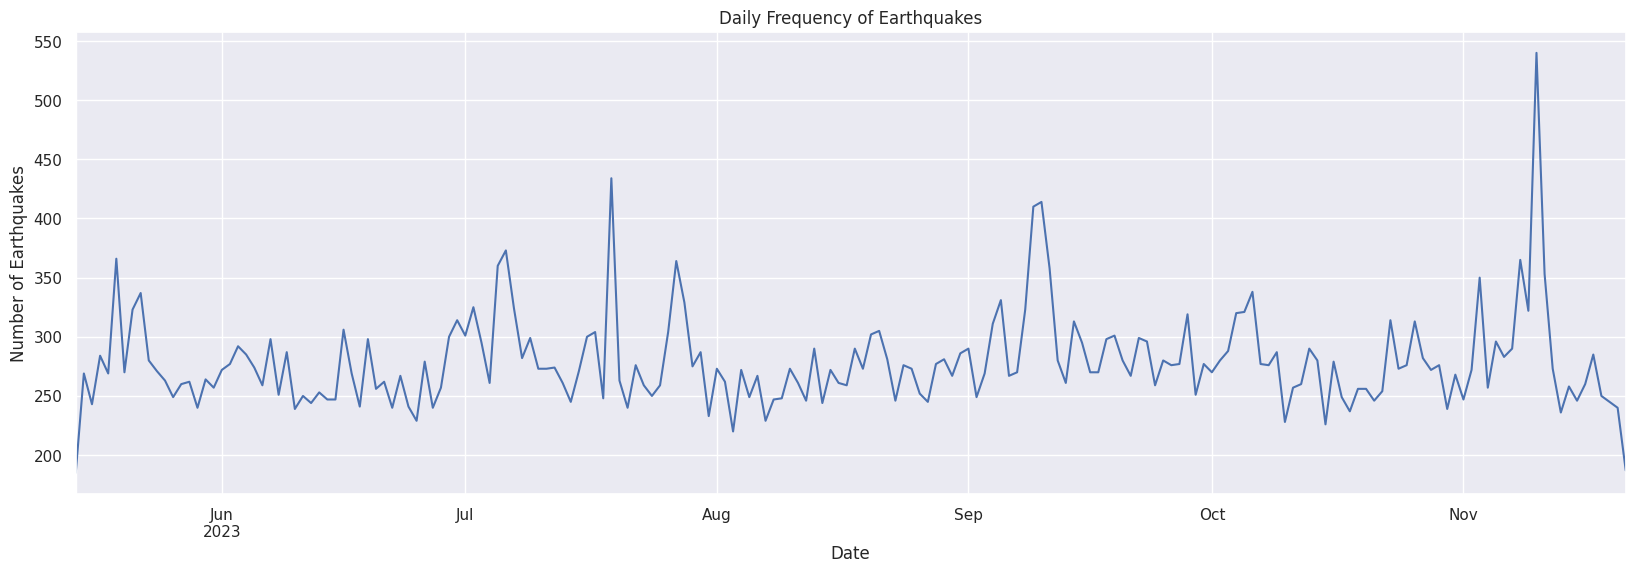

In [ ]:
daily_counts = dfcopy.resample('D').size()

plt.figure(figsize=(20, 6))
daily_counts.plot(title='Daily Frequency of Earthquakes', xlabel='Date', ylabel='Number of Earthquakes')
plt.show()

#### Are there specific days, months, or seasons with higher seismic activity?

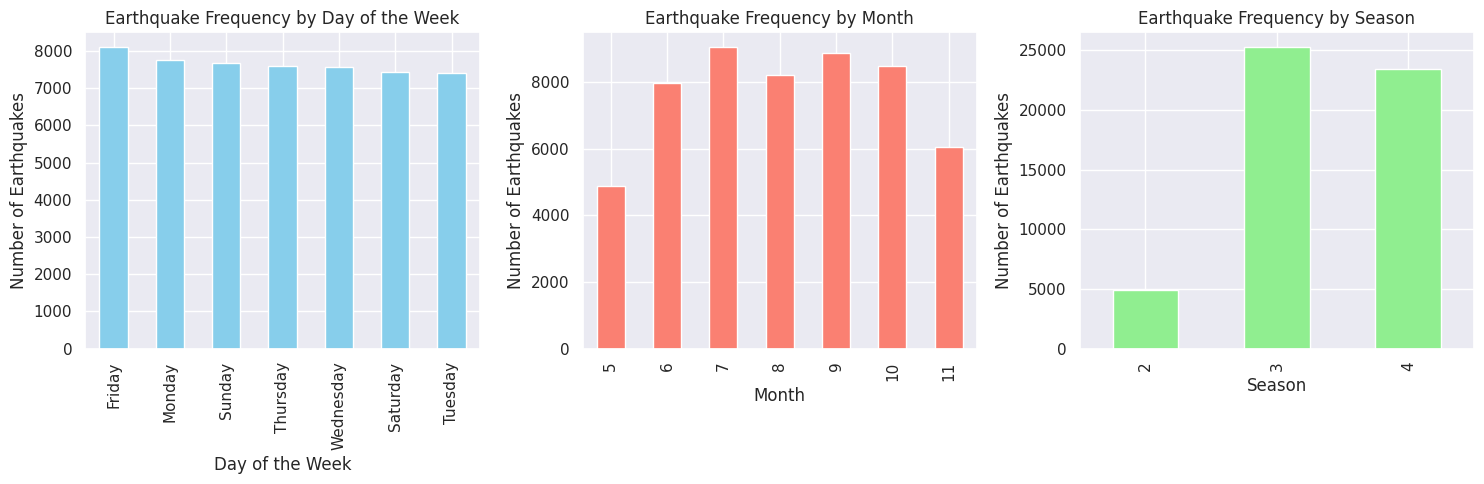

In [ ]:
dfcopy['Day of Week'] = dfcopy.index.day_name()
dfcopy['Month'] = dfcopy.index.month
dfcopy['Season'] = (dfcopy.index.month % 12 + 3) // 3  # Calculating season based on month

# Count the occurrences for each day of the week, month, and season
day_of_week_counts = dfcopy['Day of Week'].value_counts()
month_counts = dfcopy['Month'].value_counts()
season_counts = dfcopy['Season'].value_counts()

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Earthquake Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Earthquakes')

plt.subplot(1, 3, 2)
month_counts.sort_index().plot(kind='bar', color='salmon')
plt.title('Earthquake Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')

plt.subplot(1, 3, 3)
season_counts.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Earthquake Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Number of Earthquakes')

plt.tight_layout()
plt.show()

March, April, May => Season 1 (Spring)

June, July, August => Season 2 (Summer)

September, October, November => Season 3 (Autumn)

December, January, February => Season 4 (Winter)

Corresponding to provided data most of the Earthquakes occures in Season 3 (Autumn) and monthly wise in July and daily wise on Friday.



### Magnitude Analysis:


1.   What is the distribution of earthquake magnitudes in the dataset?
2.   Identify any outliers or extreme magnitude events?

#### What is the distribution of earthquake magnitudes in the dataset?

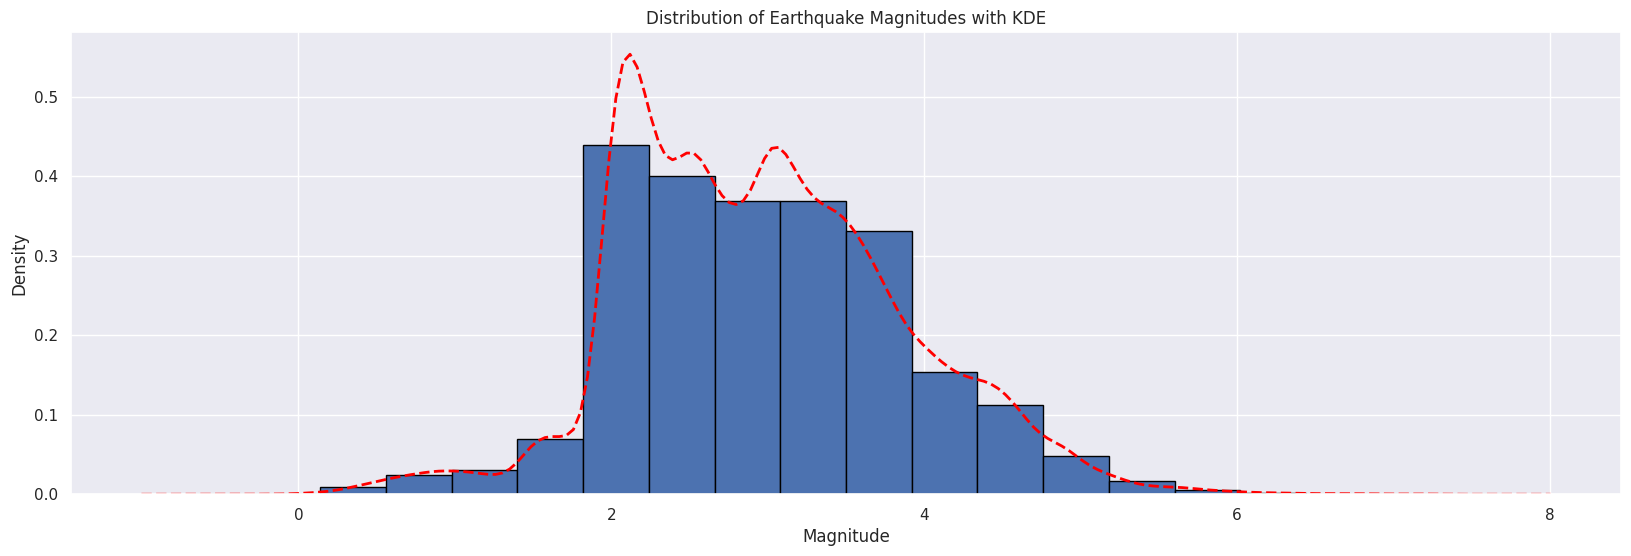

In [ ]:
plt.figure(figsize=(20, 6))

plt.hist(dfcopy['Magnitude'], bins=20, edgecolor='black', density=True)

# KDE line
sns.kdeplot(dfcopy['Magnitude'], color='red', linestyle='dashed', linewidth=2)

plt.title('Distribution of Earthquake Magnitudes with KDE')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.show()

#### Identify any outliers or extreme magnitude events?

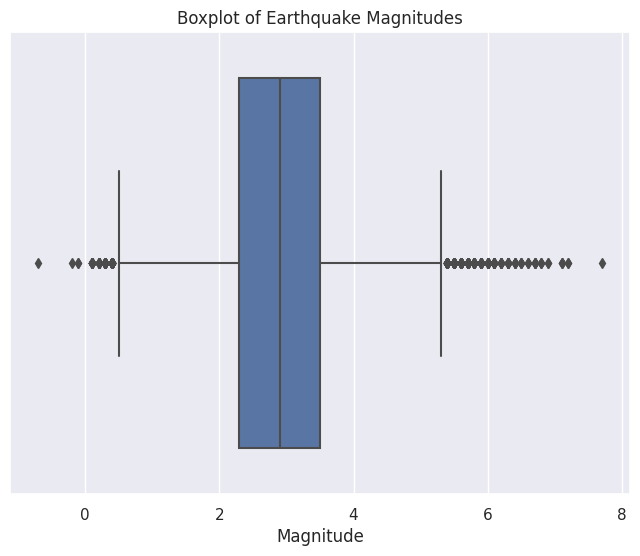

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfcopy['Magnitude'])
plt.title('Boxplot of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.show()

# Time Series Analysis



In [ ]:
import plotly.express as px

fig = px.line(df_sort, x=df_sort.index, y='Depth', markers=True, title='Trend of Depth over Time')
fig.update_layout(xaxis_title='Date & Time', yaxis_title='Depth', template='plotly_white')

# Show the interactive plot
fig.show()

In [ ]:
fig = px.line(df_sort, x=df_sort.index, y='Magnitude', markers=True, title='Trend of Magnitude over Time')
fig.update_layout(xaxis_title='Date & Time', yaxis_title='Magnitude', template='plotly_white')

# Show the interactive plot
fig.show()

Magnitude and Depth Column have white noise which has not contains any trend and pattern.

### Finding Stationarity

In [ ]:
sts.adfuller(df_sort.Depth)

(-36.96492849090439,
 0.0,
 32,
 53506,
 {'1%': -3.4304722220638726,
  '5%': -2.8615940197201306,
  '10%': -2.566798752896849},
 602328.6337389817)

 The extremely low p-value and the highly negative ADF statistic, we have strong evidence to reject the null hypothesis, suggesting that the Depth time series is stationary.

In [ ]:
sts.adfuller(df_sort.Magnitude)

(-30.116791711775853,
 0.0,
 41,
 53497,
 {'1%': -3.4304722426267333,
  '5%': -2.8615940288083186,
  '10%': -2.566798757734221},
 139470.2089934123)

The results strongly indicate that the Magnitude time series is stationary. The low p-value and the highly negative ADF statistic provide compelling evidence against the null hypothesis of non-stationarity.

### Additive Decomposition for Depth and Magnitude Column

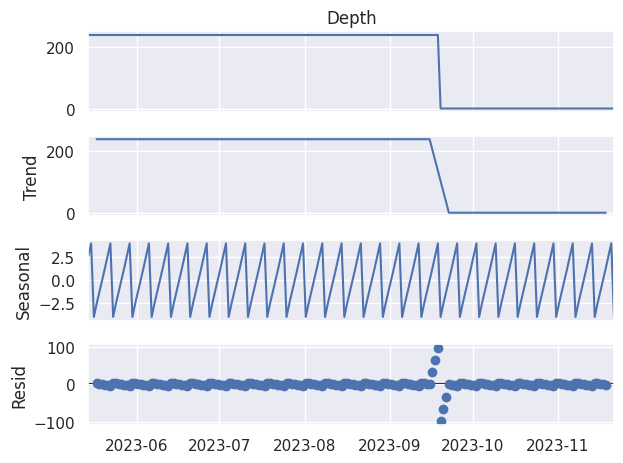

In [ ]:
df_daily = df_sort.asfreq('D')
df_daily['Depth'].fillna(method='ffill', inplace=True)  # Forward fill
df_daily.dropna(subset=['Depth'], inplace=True)

s_dec_additive = seasonal_decompose(df_daily['Depth'], model='additive')
s_dec_additive.plot()
plt.show()

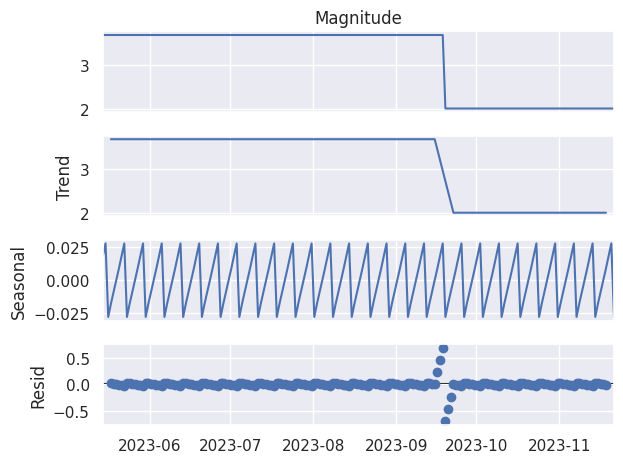

In [ ]:
df_daily = df_sort.asfreq('D')
df_daily['Magnitude'].fillna(method='ffill', inplace=True)  # Forward fill
df_daily.dropna(subset=['Magnitude'], inplace=True)

s_dec_additive = seasonal_decompose(df_daily.Magnitude, model='additive')
s_dec_additive.plot()
plt.show()

### AutoCorrelation Function

Text(0.5, 1.0, 'AutoCorrelation of Depth')

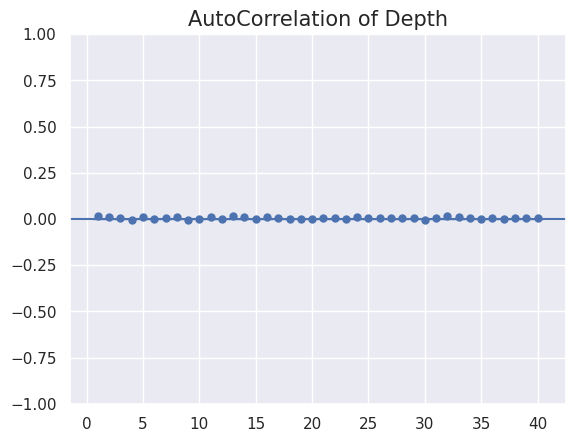

In [ ]:
sgt.plot_acf(df_sort.Depth, lags=40, zero=False)
plt.title("AutoCorrelation of Depth", size=15)

Text(0.5, 1.0, 'AutoCorrelation of Magnitude')

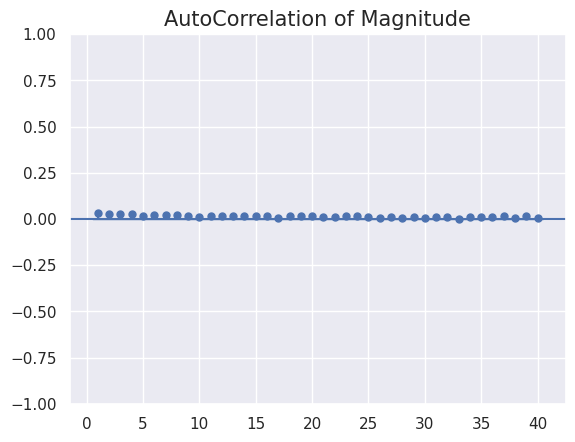

In [ ]:
sgt.plot_acf(df_sort.Magnitude, lags=40, zero=False)
plt.title("AutoCorrelation of Magnitude", size=15)

The autocorrelation values are close to 0.0 for various lags, it indicates that the current value of your time series is not significantly correlated with its past values at those lags. This might suggest that our time series is relatively stationary, and there is no clear trend or seasonality.

### Partial AutoCorrelation Function

Text(0.5, 1.0, 'Partial AutoCorrelation of Depth')

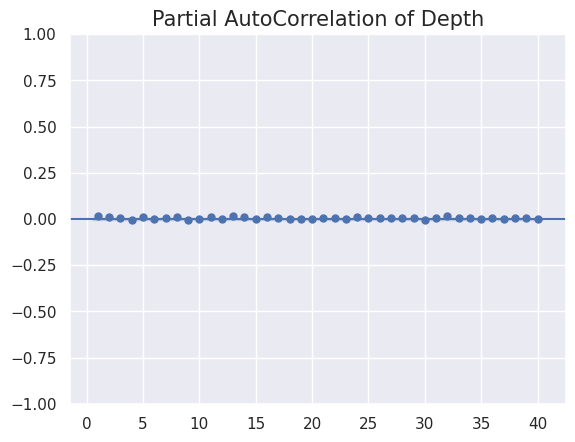

In [ ]:
sgt.plot_pacf(df_sort.Depth, lags=40, zero=False)
plt.title("Partial AutoCorrelation of Depth", size=15)

Text(0.5, 1.0, 'Partial AutoCorrelation of Magnitude')

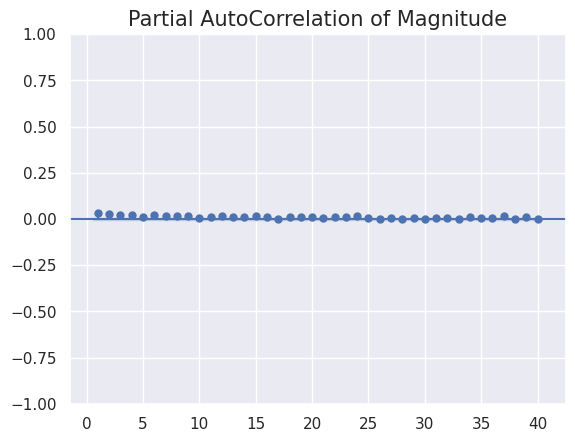

In [ ]:
sgt.plot_pacf(df_sort.Magnitude, lags=40, zero=False)
plt.title("Partial AutoCorrelation of Magnitude", size=15)

it suggests that there might not be a significant partial autocorrelation at those lags.

# Splitting Data

In [ ]:
size = int(len(df_sort)*0.8)
train_df = df_sort.iloc[:size]
test_df = df_sort.iloc[size:]

In [ ]:
train_df.head()

Latitude  Longitude  Depth  Magnitude  \
Date & Time                                                  
2023-05-14 09:27:39    -23.97     -67.46  240.0        3.7   
2023-05-14 09:28:10     15.89     -93.52  106.0        3.9   
2023-05-14 09:48:51     19.40    -155.24    2.0        2.2   
2023-05-14 09:49:42     11.52     141.62   10.0        5.1   
2023-05-14 09:50:19     18.08    -103.27    7.0        3.5   

                                    Lands     Country  
Date & Time                                            
2023-05-14 09:27:39          ANTOFAGASTA,       CHILE  
2023-05-14 09:28:10              CHIAPAS,      MEXICO  
2023-05-14 09:48:51   ISLAND, OF, HAWAII,      HAWAII  
2023-05-14 09:49:42       STATE, OF, YAP,  MICRONESIA  
2023-05-14 09:50:19  OFFSHORE, MICHOACAN,      MEXICO

In [ ]:
test_df.shape

(10708, 6)

In [ ]:
train_df.drop(columns=['Latitude', 'Longitude', 'Lands', 'Country'], inplace=True)

<ipython-input-82-56bf9fbdc3ec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_df

Depth  Magnitude
Date & Time                          
2023-05-14 09:27:39  240.0        3.7
2023-05-14 09:28:10  106.0        3.9
2023-05-14 09:48:51    2.0        2.2
2023-05-14 09:49:42   10.0        5.1
2023-05-14 09:50:19    7.0        3.5
...                    ...        ...
2023-10-14 11:28:00   10.0        3.2
2023-10-14 11:29:35   70.0        4.6
2023-10-14 11:30:30  141.0        3.0
2023-10-14 11:48:18   14.0        3.0
2023-10-14 11:48:22    5.0        2.1

[42831 rows x 2 columns]

# Training ARIMA Model For Depth Column

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
traindf = train_df.asfreq('D')

In [ ]:
p, d, q = (18,0,11)
model = ARIMA(traindf['Depth'], order=(p, d, q))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Depth   No. Observations:                  154
Model:               ARIMA(18, 0, 11)   Log Likelihood                  -9.092
Date:                Wed, 22 Nov 2023   AIC                             80.183
Time:                        12:45:18   BIC                            174.329
Sample:                    05-14-2023   HQIC                           118.425
                         - 10-14-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.0000   5.04e-08   2.38e+09      0.000     120.000     120.000
ar.L1         -3.4151      0.000  -3.13e+04      0.000      -3.415      -3.415
ar.L2         -6.1920      0.000  -1.89e+04      0.000      -6.193      -6.191
ar.L3         -7.1140      0.001  -1.39e+04      0.000      -7.115      -7.113
ar.L4         -5.1441      0.000  -3.32e+04      0.000      -5.144      -5.144
ar.L5         -1.8001      0.000  -4314.967      0.000      -1.801      -1.799
ar.L6          0.2757      0.001    418.868      0.000       0.274       0.277
ar.L7         -0.0238      0.000    -50.284      0.000      -0.025      -0.023
ar.L8         -1.4000      0.000  -7214.640      0.000      -1.400      -1.400
ar.L9         -1.8013   2.72e-05  -6.63e+04      0.000      -1.801      -1.801
ar.L10        -0.6697      0.000  -2115.670      0.000      -0.670      -0.669
ar.L11         0.5140      0.001    809.436      0.000       0.513       0.515
ar.L12        -0.3653      0.001   -576.429      0.000      -0.366      -0.364
ar.L13        -3.4330      0.000  -2.66e+04      0.000      -3.433      -3.433
ar.L14        -6.4186      0.000  -1.61e+04      0.000      -6.419      -6.418
ar.L15        -6.9497      0.000  -1.55e+04      0.000      -6.951      -6.949
ar.L16        -4.9249   9.68e-05  -5.09e+04      0.000      -4.925      -4.925
ar.L17        -2.2216      0.000  -1.01e+04      0.000      -2.222      -2.221
ar.L18        -0.5161      0.000  -1479.326      0.000      -0.517      -0.515
ma.L1          1.4762   8.07e-07   1.83e+06      0.000       1.476       1.476
ma.L2          1.6677   7.44e-08   2.24e+07      0.000       1.668       1.668
ma.L3          1.3744   8.66e-07   1.59e+06      0.000       1.374       1.374
ma.L4          0.7033    8.4e-07   8.37e+05      0.000       0.703       0.703
ma.L5         -0.0778   1.26e-06  -6.19e+04      0.000      -0.078      -0.078
ma.L6         -0.7071   1.31e-06   -5.4e+05      0.000      -0.707      -0.707
ma.L7         -1.0675   1.84e-07  -5.81e+06      0.000      -1.067      -1.067
ma.L8         -1.1658    1.6e-06   -7.3e+05      0.000      -1.166      -1.166
ma.L9         -1.0673   2.91e-07  -3.67e+06      0.000      -1.067      -1.067
ma.L10        -0.8247   1.71e-06  -4.82e+05      0.000      -0.825      -0.825
ma.L11        -0.4739   1.12e-06  -4.22e+05      0.000      -0.474      -0.474
sigma2         1.0096   1.28e-06   7.88e+05      0.000       1.010       1.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            145583.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            12.26
Prob(H) (two-sided):                  0.00   Kurtosis:                       151.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

In [ ]:
import plotly.graph_objects as go

# Plot training data
trace_train = go.Scatter(x=train_df.index, y=train_df['Depth'], mode='lines', name='Training Data')

# Plot testing data
trace_test = go.Scatter(x=test_df.index, y=test_df['Depth'], mode='lines', name='Testing Data')

# Plot forecast
forecast_steps = 100  # Adjust this based on your needs
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test_df.index[-1], periods=forecast_steps + 1, freq=test_df.index.freq)
trace_forecast = go.Scatter(x=forecast_index[1:], y=forecast.predicted_mean.values, mode='lines', name='Forecast')

# Create layout
layout = go.Layout(
    title='ARIMA Forecasting',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Depth'),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace_train, trace_test, trace_forecast], layout=layout)

# Show figure
fig.show()


#Train SARIMA for Depth Column

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(traindf['Depth'], order=(20,0,50), seasonal_order=(0,0,0,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.



In [ ]:
import plotly.graph_objects as go

# Plot training data
trace_train = go.Scatter(x=train_df.index, y=train_df['Depth'], mode='lines', name='Training Data')

# Plot testing data
trace_test = go.Scatter(x=test_df.index, y=test_df['Depth'], mode='lines', name='Testing Data')

# Forecast
forecast_steps = 100  # Adjust this based on your needs
forecast = model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test_df.index[-1], periods=forecast_steps + 1, freq=test_df.index.freq)
trace_forecast_sarima = go.Scatter(x=forecast_index[1:], y=forecast.predicted_mean.values, mode='lines', name='SARIMA Forecast')

# Create layout
layout = go.Layout(
    title='SARIMA Forecasting',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Depth'),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace_train, trace_test, trace_forecast_sarima], layout=layout)

# Show figure
fig.show()
